In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [219]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [220]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
pos=neg=0
for i in df['RainTomorrow']:
    if i=='Yes':
        pos+=1
    else:
        neg+=1
neg/pos

## Creating Training ,Validation and Test dataset

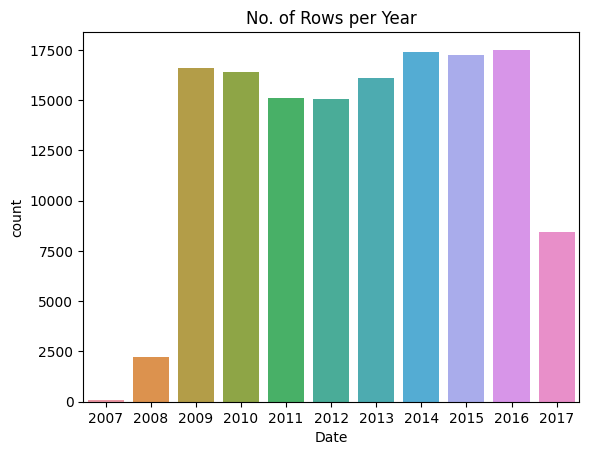

In [221]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);
plt.show()

In [222]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]



print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)


train_targets=train_df['RainTomorrow']
val_targets=val_df['RainTomorrow']
test_targets=test_df['RainTomorrow']


train_df.drop(['RainTomorrow','Date'],axis=1,inplace=True);
val_df.drop(['RainTomorrow','Date'],axis=1,inplace=True);
test_df.drop(['RainTomorrow','Date'],axis=1,inplace=True);

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [223]:
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_df.select_dtypes('object').columns.tolist()

## Imputer to fill missing data

In [224]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean');
imputer.fit(df[numeric_cols]);
train_df[numeric_cols]=imputer.transform(train_df[numeric_cols]);
val_df[numeric_cols]=imputer.transform(val_df[numeric_cols]);
test_df[numeric_cols]=imputer.transform(test_df[numeric_cols]);

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

## Scaling features using MinMaxScaler 

In [225]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[numeric_cols]);
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
val_df[numeric_cols]=scaler.transform(val_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

# One-Hot Encoder

In [226]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])
encoded_cols=list(encoder.get_feature_names(categorical_cols))
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols]);
val_df[encoded_cols]=encoder.transform(val_df[categorical_cols]);
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols]);

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [227]:
train_df=train_df[numeric_cols+encoded_cols]
val_df=val_df[numeric_cols+encoded_cols]
test_df=test_df[numeric_cols+encoded_cols]

In [228]:
train_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037723,0.525852,0.286822,0.184615,0.298851,0.22,0.13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144549,0.556604,0.786389,0.000000,0.037723,0.525852,0.193798,0.146154,0.229885,0.16,0.08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144550,0.608491,0.805293,0.000000,0.037723,0.525852,0.255814,0.200000,0.103448,0.15,0.08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144551,0.674528,0.818526,0.000000,0.037723,0.525852,0.286822,0.215385,0.195402,0.22,0.09,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [229]:
train_targets.unique()

array(['No', 'Yes'], dtype=object)

In [230]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_targets=lb.fit_transform(train_targets.astype(str))
val_targets=lb.fit_transform(val_targets.astype(str))
test_targets=lb.fit_transform(test_targets.astype(str))

Hyperparameters

1. verbosity :- Only used for Display   0 (silent), 1 (warning), 2 (info), and 3 (debug).
2. nthread :- Number of parallel threads used to run XGBoost (2* no of cores . Omen has 6 cores and 12 theards. Using 6-8 is advisable as we may run in out of memory issues)
3. Learning_rate :- Used to Prevent over fitting . Say step_size=2 and we use lr=0.1 then we only move by 0.2 
4. objective :- gbtree(default and mostly used one), gblinear(for linear cases only)
5. 


In [255]:
%%time
from xgboost import XGBClassifier
xgbc = XGBClassifier(tree_method='gpu_hist',gpu_id=0,learning_rate=0.05,objective='binary:logistic',scale_pos_weight=2, max_depth=12,n_estimators=300,verbosity=0,nthread=6)

xgbc.fit(train_df,train_targets)
xgbc.score(train_df,train_targets)

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Wall time: 26.3 s


0.9430132945407524

In [256]:
xgbc.score(val_df,val_targets)

0.8553189019789914

In [257]:
xgbc.score(test_df,test_targets)

0.8416493416493417

In [262]:
def test_model(**params):
        model=XGBClassifier(tree_method='gpu_hist',gpu_id=0,random_state=42,**params,nthread=6,objective='binary:logistic',)
        model.fit(train_df,train_targets)
        return model.score(train_df,train_targets),model.score(val_df,val_targets)

In [272]:
print(test_model(learning_rate=0.1,verbosity=0))
print(test_model(learning_rate=0.25,verbosity=0))
print(test_model(learning_rate=0.5,verbosity=0))
print(test_model(learning_rate=2,verbosity=0))

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.869994342748616, 0.8572340549010504)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.8878854002505354, 0.8597875921304625)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.906463409706227, 0.8556671116011839)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.7701640602901362, 0.7842841390517091)


In [275]:
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=1))
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=2))
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=3))
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=4))

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.8878854002505354, 0.8597875921304625)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.8808441427243706, 0.8542162381753816)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.8617509193033499, 0.8383727003656201)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.8424455489554289, 0.8204399048227032)


In [277]:
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=2,n_estimators=25))
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=2,n_estimators=50))
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=2,n_estimators=100))
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=2,n_estimators=200))
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=2,n_estimators=300))

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.8519113427890249, 0.8485868492832686)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.8633975835454802, 0.8505600371423597)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.8808441427243706, 0.8542162381753816)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.9044025538449105, 0.8552028321049272)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.9236069018466885, 0.8552028321049272)


In [280]:
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=2,n_estimators=200,max_depth=6))
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=2,n_estimators=200,max_depth=12))
print(test_model(learning_rate=0.25,verbosity=0,scale_pos_weight=2,n_estimators=200,max_depth=24))

(0.9044025538449105, 0.8552028321049272)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.9995453994423567, 0.8583947536416923)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.9999797955307714, 0.8593233126342058)


In [294]:
# model seems to work the best
model = XGBClassifier(tree_method='gpu_hist',gpu_id=0,objective='binary:logistic',nthread=6,
                      learning_rate=0.25,verbosity=0,scale_pos_weight=2,n_estimators=50,max_depth=10)
model.fit(train_df,train_targets)
model.score(train_df,train_targets),xgbc.score(val_df,val_targets),xgbc.score(test_df,test_targets),

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.9291833353537803, 0.8553189019789914, 0.8416493416493417)

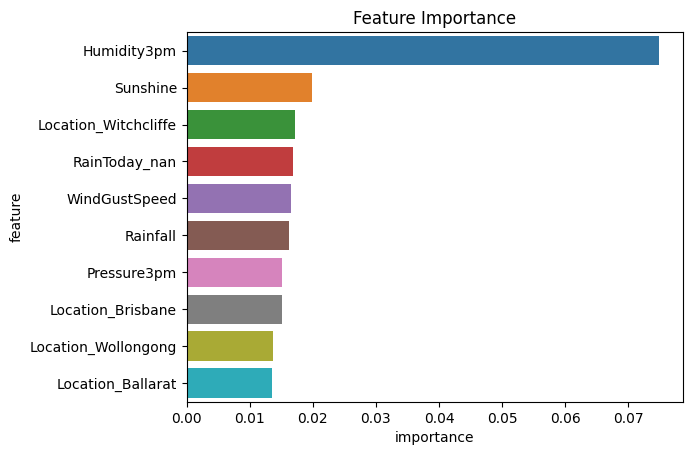

In [295]:
importance_df = pd.DataFrame({
    'feature': train_df.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');
plt.show()

In [298]:
sample_test = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}
sample_df=pd.DataFrame([sample_test])
sample_df[numeric_cols] = imputer.transform(sample_df[numeric_cols]);
sample_df[numeric_cols] = scaler.transform(sample_df[numeric_cols]);
sample_df[encoded_cols] = encoder.transform(sample_df[categorical_cols]);
sample_df=sample_df[numeric_cols+encoded_cols]

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [300]:
prediction = xgbc.predict(sample_df)
prediction

array([1])

In [299]:
prob = xgbc.predict_proba(sample_df)[0]
prob

array([0.15115172, 0.8488483 ], dtype=float32)